In [6]:
import numpy as py
import pandas as pd

In [11]:
df = pd.read_csv('../data/used_cars.csv')
print("Shape: ", df.shape)
print("Info: ", df.info())

Shape:  (38531, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  lo

In [13]:
df["engine_fuel"].unique()

array(['gasoline', 'gas', 'diesel', 'hybrid-petrol', 'hybrid-diesel',
       'electric'], dtype=object)

In [14]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hafiz\AppData\Local\Temp\ipykernel_11932\133033077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="viridis")


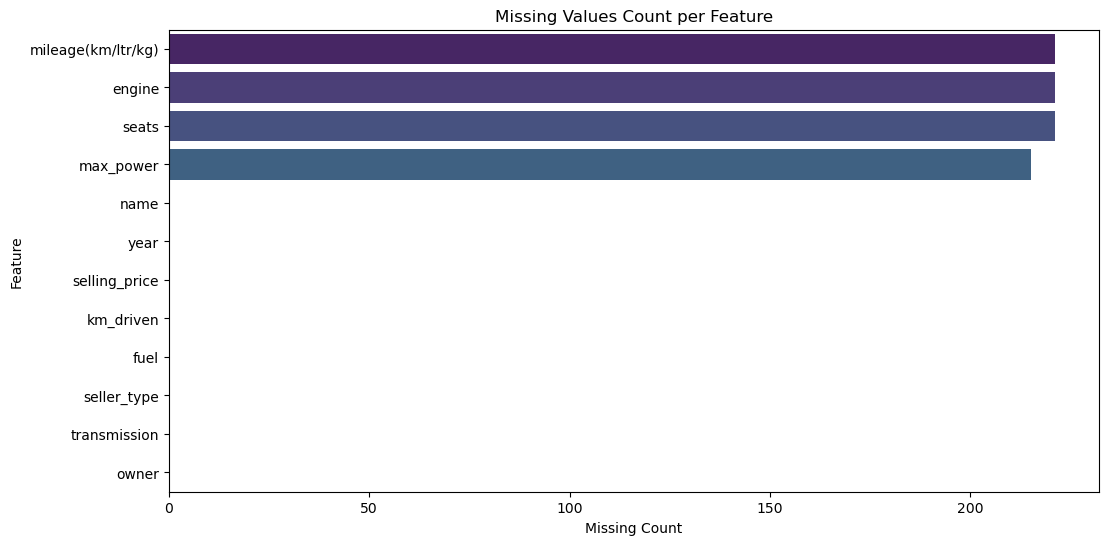

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=missing.values, y=missing.index, palette="viridis")
plt.title("Missing Values Count per Feature")
plt.xlabel("Missing Count")
plt.ylabel("Feature")
plt.show()


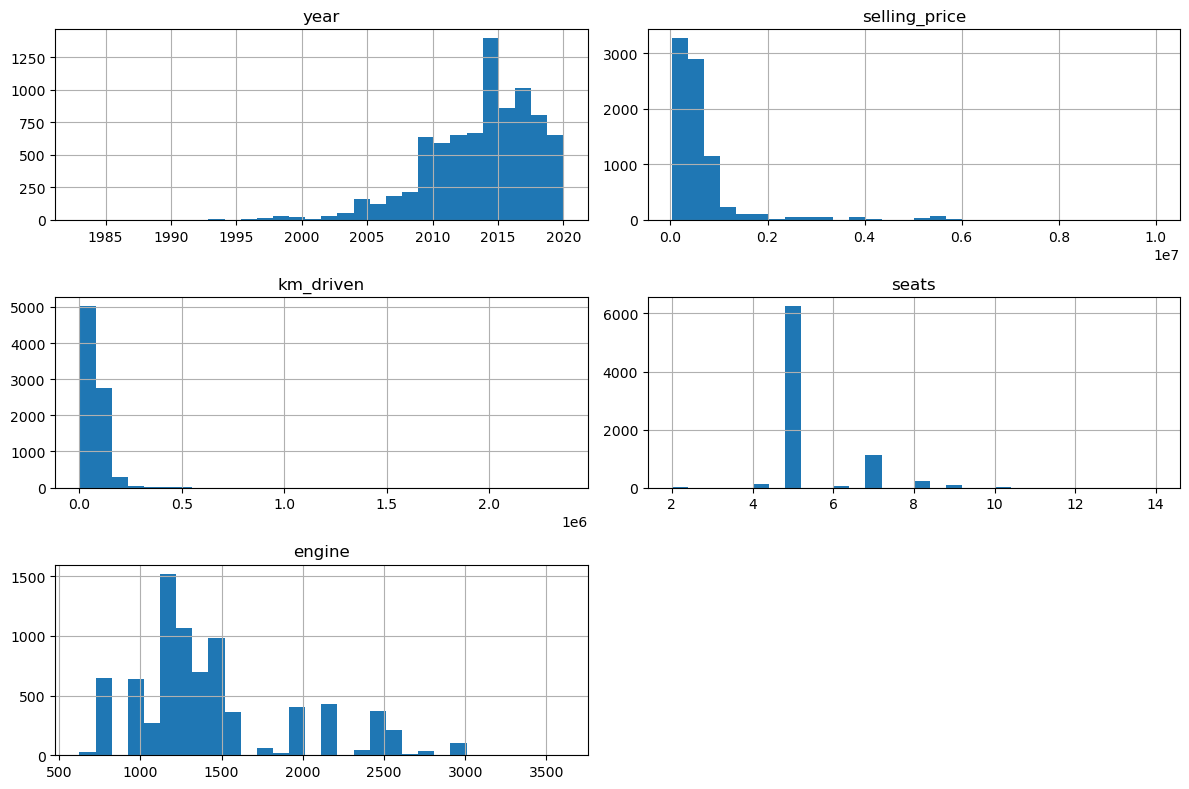

In [12]:
# Numerical distributions
num_cols = ["year", "selling_price", "km_driven", "seats", "engine"]
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


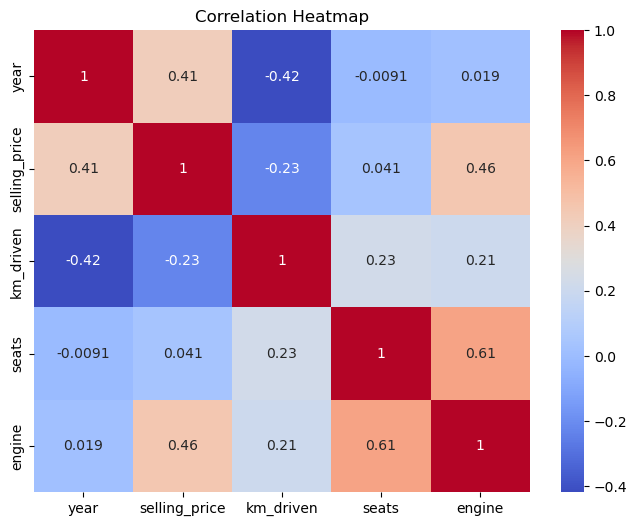

In [13]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [14]:

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"].dropna(), kde=True, bins=40)
plt.title("Price Distribution")
plt.show()



KeyError: 'price'

<Figure size 800x500 with 0 Axes>

In [15]:
# Price vs Year
plt.figure(figsize=(8,5))
sns.boxplot(x="year", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Price vs Year")
plt.show()

ValueError: Could not interpret value `price` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

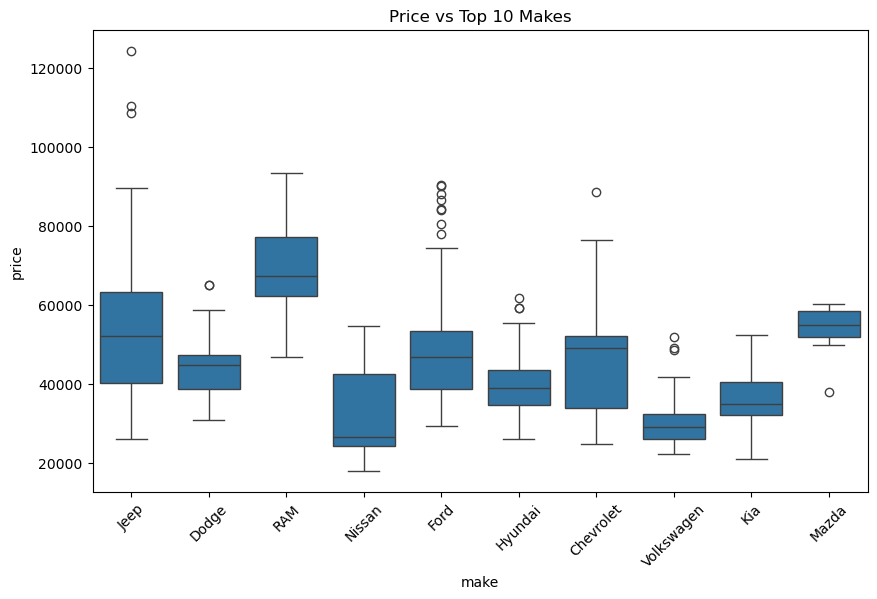

In [25]:
# Price vs Make (Top 10 makes)
top_makes = df["make"].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
sns.boxplot(x="make", y="price", data=df[df["make"].isin(top_makes)])
plt.xticks(rotation=45)
plt.title("Price vs Top 10 Makes")
plt.show()

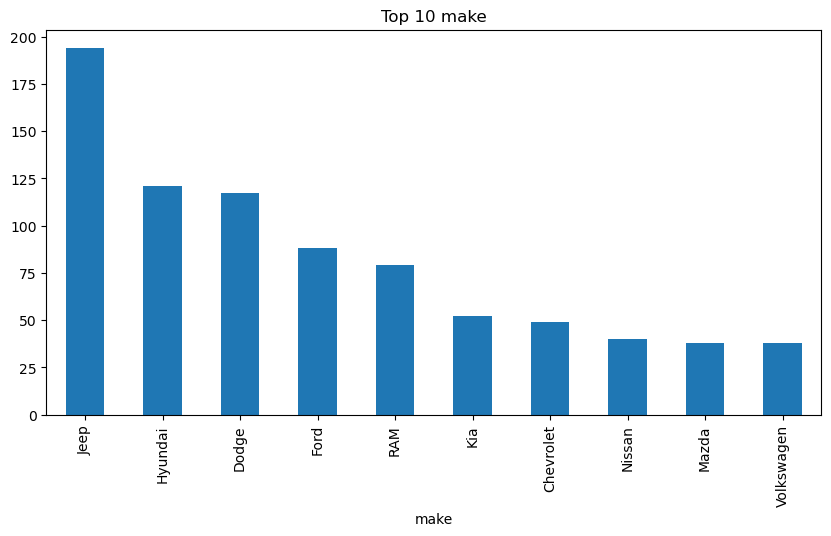

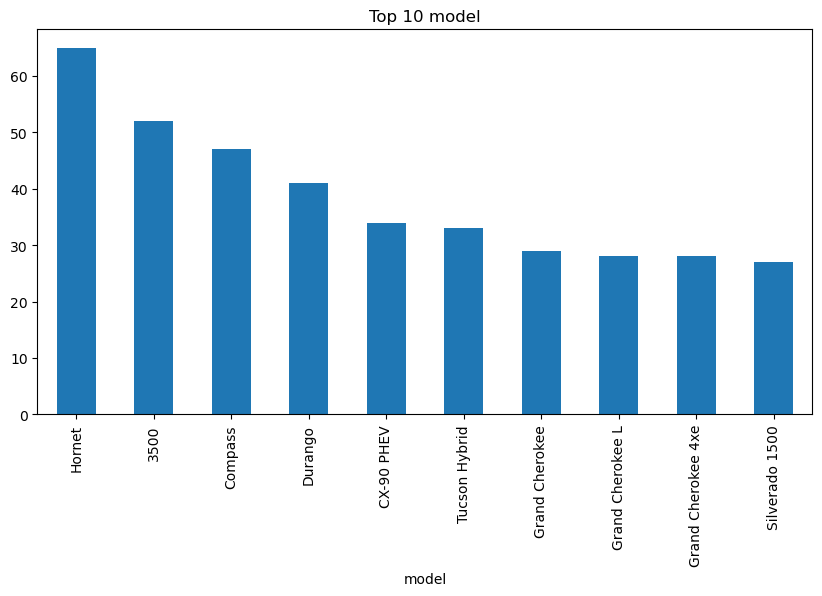

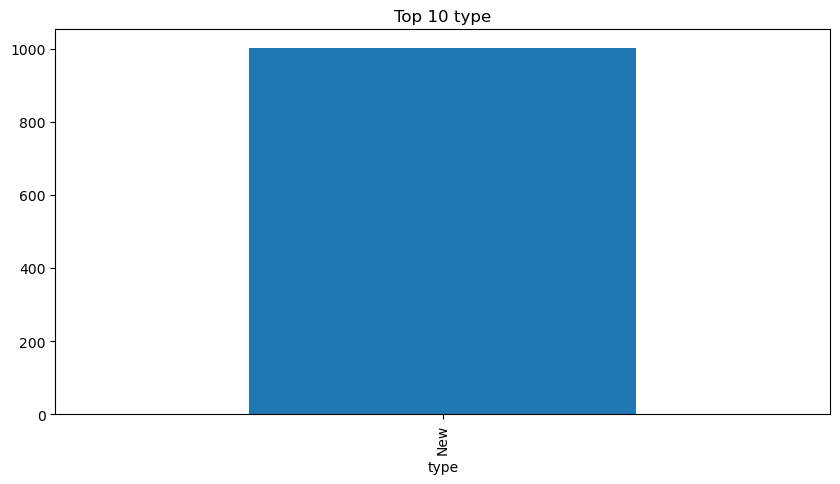

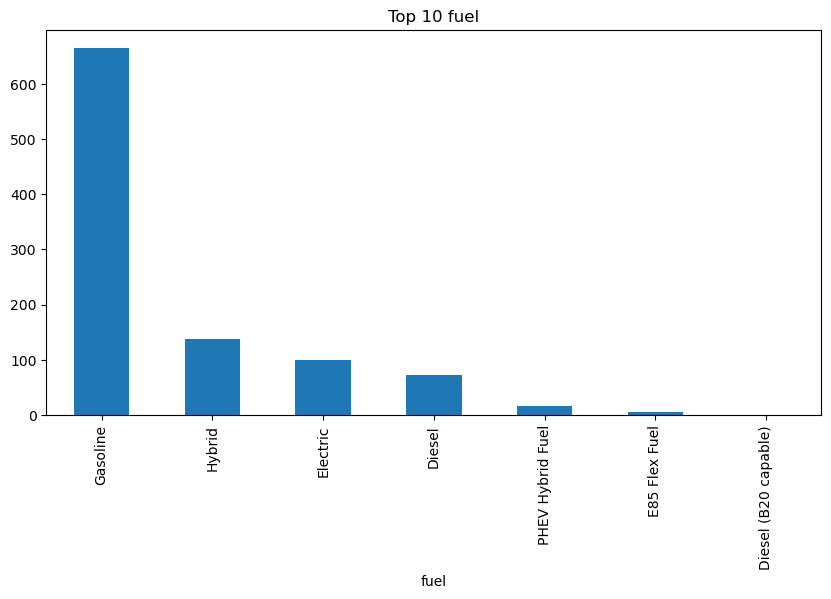

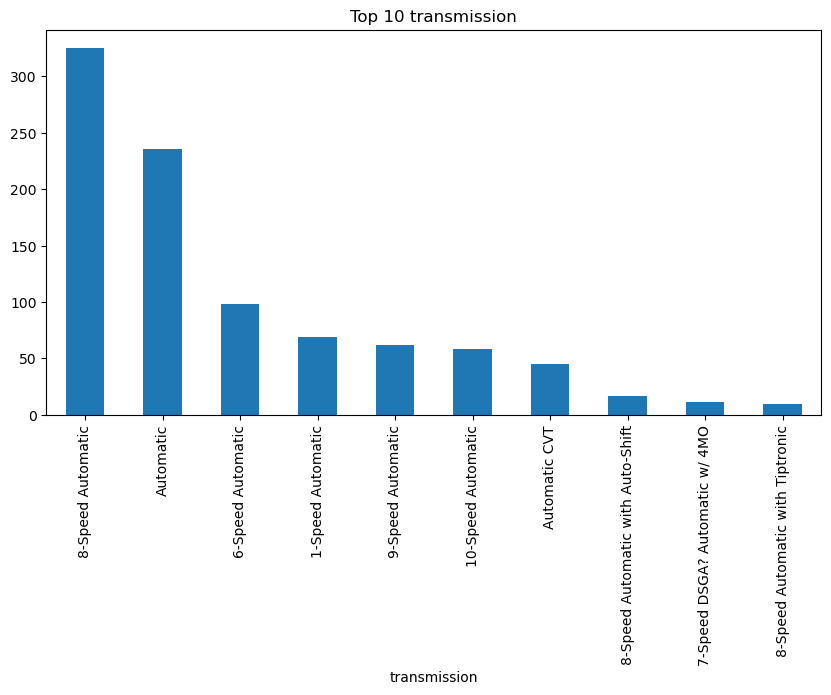

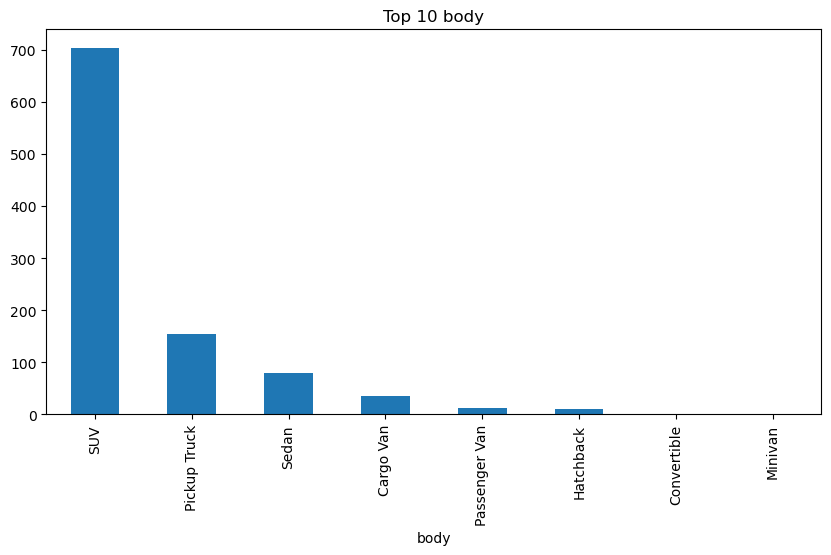

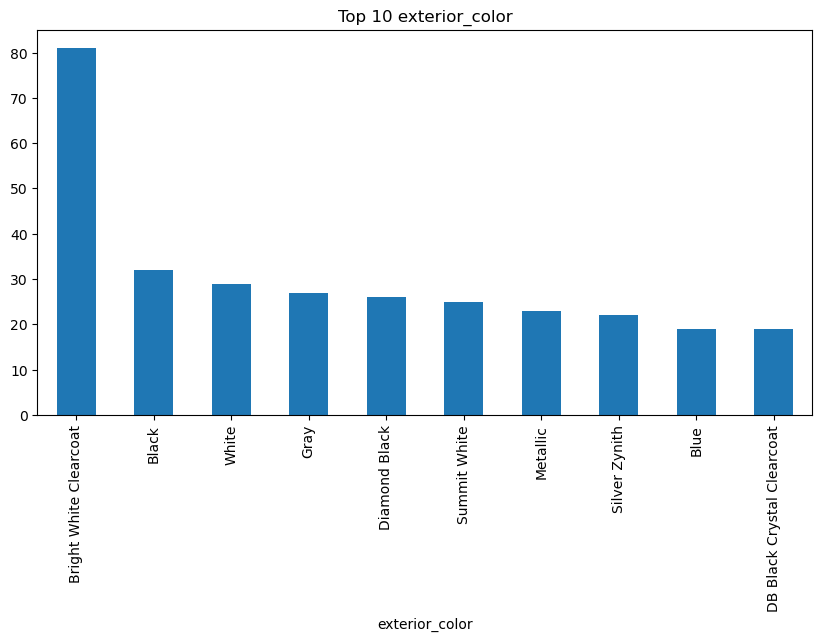

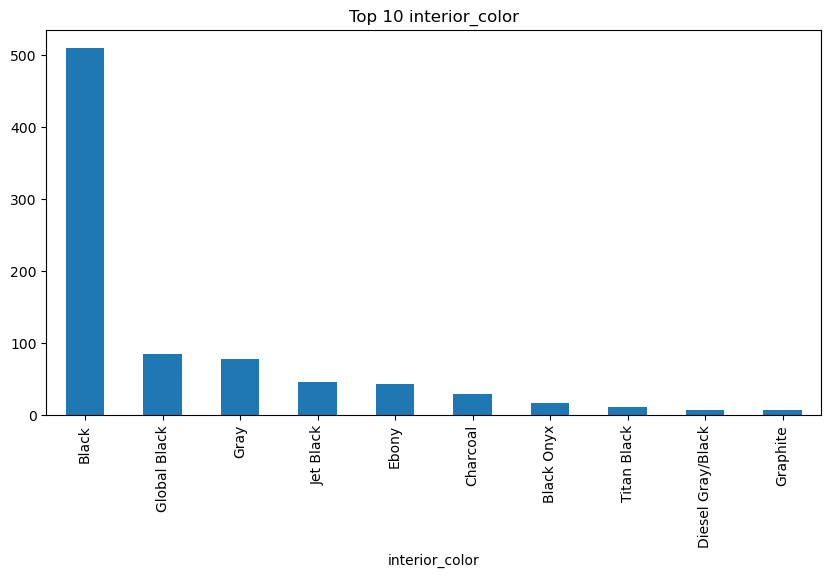

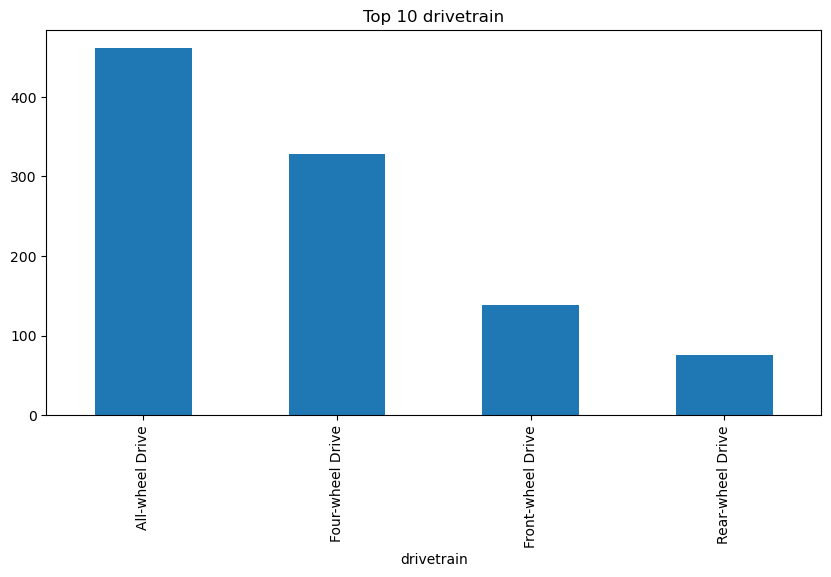

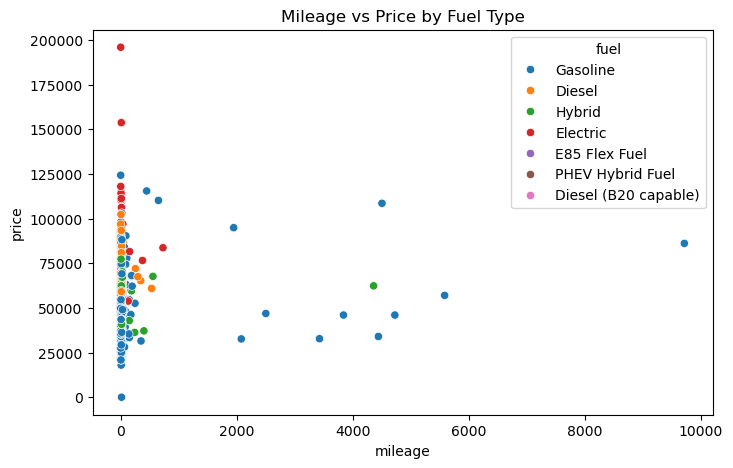

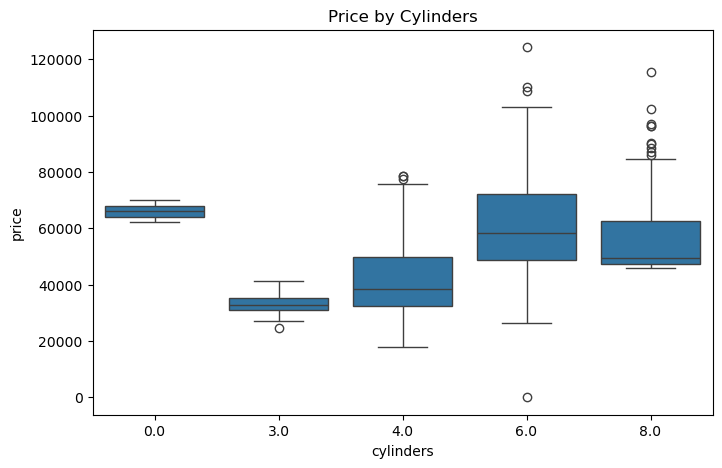

In [27]:
# Categorical counts
cat_cols = ["make", "model", "type", "fuel", "transmission", "body", 
            "exterior_color", "interior_color", "drivetrain"]

for col in cat_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().nlargest(10).plot(kind="bar")
    plt.title(f"Top 10 {col}")
    plt.show()

# Mileage vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="mileage", y="price", hue="fuel", data=df)
plt.title("Mileage vs Price by Fuel Type")
plt.show()

# Cylinders vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x="cylinders", y="price", data=df)
plt.title("Price by Cylinders")
plt.show()